In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

import seaborn as sns

%matplotlib inline

In [97]:
loans = pd.read_csv('resources/loan_data.csv')

In [98]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [99]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [100]:
loans['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [101]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [102]:
loans[loans['credit.policy']==0]['fico']

7710    642
7711    647
7712    682
7713    677
7714    652
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 1868, dtype: int64

In [103]:
loans[loans['credit.policy']==1]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64

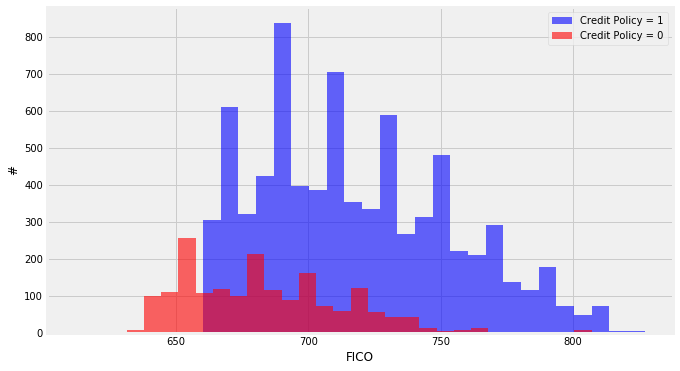

In [135]:
plt.figure(figsize=(10,6))
plt.xlabel('FICO')
plt.ylabel('#')

p1 = loans[loans['credit.policy']==1]['fico'].hist(bins=30,color='blue',label='Credit Policy = 1',alpha=.6)
p1.legend()

p2 = loans[loans['credit.policy']==0]['fico'].hist(bins=30,color='red',label='Credit Policy = 0',alpha=.6)
p2.legend()

Red means no (or 0)
Blue means yes (or 1)


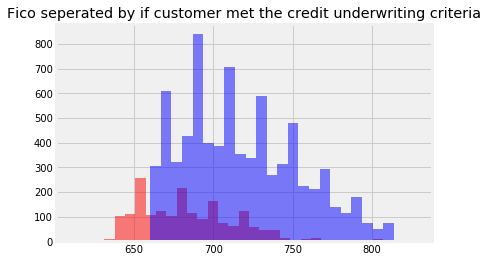

In [105]:
plt.title('Fico seperated by if customer met the credit underwriting criteria')

plt.hist(loans[loans['credit.policy']==0]['fico'],bins=30,alpha=.50,color='red');
plt.hist(loans[loans['credit.policy']==1]['fico'],bins=30,alpha=.50,color='blue');

print('Red means no (or 0)')
print('Blue means yes (or 1)')

Red means no (or 0)
Blue means yes (or 1)


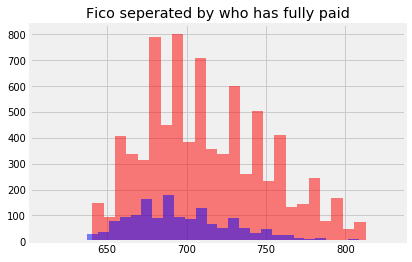

In [106]:
plt.title('Fico seperated by who has fully paid')

plt.hist(loans[loans['not.fully.paid']==0]['fico'],bins=30,alpha=.50,color='red');
plt.hist(loans[loans['not.fully.paid']==1]['fico'],bins=30,alpha=.50,color='blue');

print('Red means no (or 0)')
print('Blue means yes (or 1)')

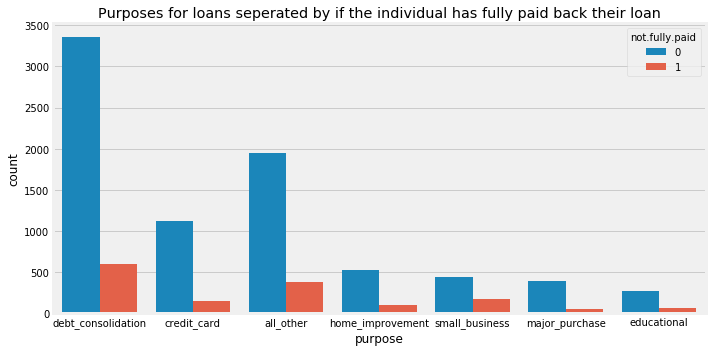

In [107]:
plt.figure(figsize=(10,5))
plt.title('Purposes for loans seperated by if the individual has fully paid back their loan')

sns.countplot(x=loans['purpose'],data=loans,hue=loans['not.fully.paid'])
plt.tight_layout()

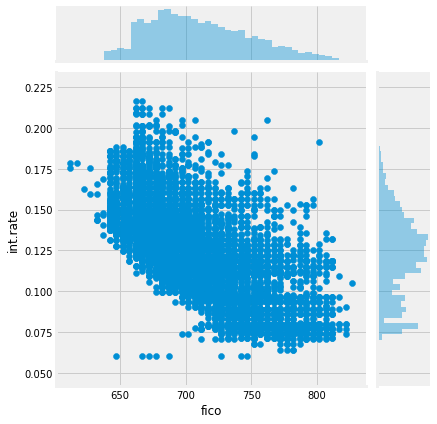

In [108]:
sns.jointplot(x='fico',y='int.rate',data=loans)

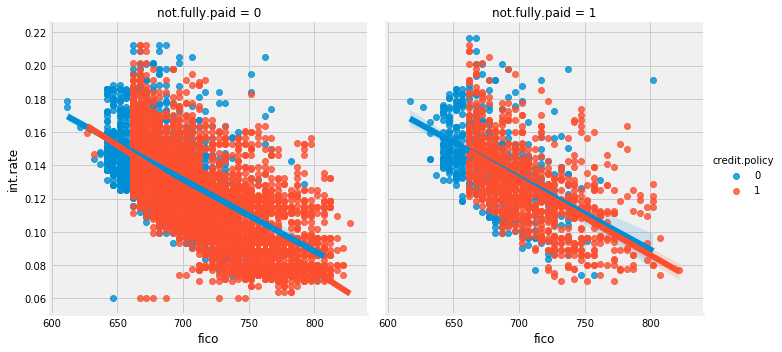

In [109]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid')

In [110]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [111]:
cat_feats = ['purpose']

In [112]:
pd.get_dummies(loans,columns=cat_feats,drop_first=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [113]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [81]:
from sklearn.model_selection import train_test_split

In [114]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtree = DecisionTreeClassifier()

In [118]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
predictions = dtree.predict(X_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2030  393]
 [ 350  101]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2423
           1       0.20      0.22      0.21       451

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfc = RandomForestClassifier(n_estimators=200)

In [124]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [125]:
rfc_pred = rfc.predict(X_test)

In [126]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2414    9]
 [ 442    9]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2423
           1       0.50      0.02      0.04       451

    accuracy                           0.84      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.84      0.78      2874

